# 차트만으로 전력량 분석해보기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import warnings

#statsmodels
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
electricity = pd.read_csv('ele_train.csv')

In [32]:
electricity

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
date_time,,,,,,,,,
2020-06-01 00,1,8179.056,17.6,2.5,92.0,0.8,0.0,0,0
2020-06-01 01,1,8135.640,17.7,2.9,91.0,0.3,0.0,0,0
2020-06-01 02,1,8107.128,17.5,3.2,91.0,0.0,0.0,0,0
2020-06-01 03,1,8048.808,17.1,3.2,91.0,0.0,0.0,0,0
2020-06-01 04,1,8043.624,17.0,3.3,92.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
2020-08-24 19,60,4114.368,27.8,2.3,68.0,0.0,0.7,1,1
2020-08-24 20,60,3975.696,27.3,1.2,71.0,0.0,0.0,1,1
2020-08-24 21,60,3572.208,27.3,1.8,71.0,0.0,0.0,1,1


In [11]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   num        122400 non-null  int64  
 1   date_time  122400 non-null  object 
 2   전력사용량      122400 non-null  float64
 3   기온         122400 non-null  float64
 4   풍속         122400 non-null  float64
 5   습도         122400 non-null  float64
 6   강수량        122400 non-null  float64
 7   일조         122400 non-null  float64
 8   비전기냉방설비운영  122400 non-null  int64  
 9   태양광보유      122400 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 9.3+ MB


In [12]:
round(electricity.describe(),3)

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
count,122400.000,122400.000,122400.000,122400.000,122400.000,122400.000,122400.000,122400.000,122400.000
mean,30.500,2324.831,24.252,2.152,80.170,0.515,0.214,0.683,0.483
std,17.318,2058.999,3.408,1.514,15.526,2.625,0.371,0.465,0.500
min,1.000,0.000,11.100,0.000,19.000,0.000,0.000,0.000,0.000
25%,15.750,1055.268,21.800,1.100,70.000,0.000,0.000,0.000,0.000
50%,30.500,1700.352,24.200,1.900,84.000,0.000,0.000,1.000,0.000
75%,45.250,2780.487,26.500,2.900,93.000,0.000,0.300,1.000,1.000
max,60.000,17739.225,36.300,20.100,100.000,81.500,1.000,1.000,1.000


In [36]:
ele = electricity[electricity['num']==1].전력사용량

<AxesSubplot:xlabel='date_time'>

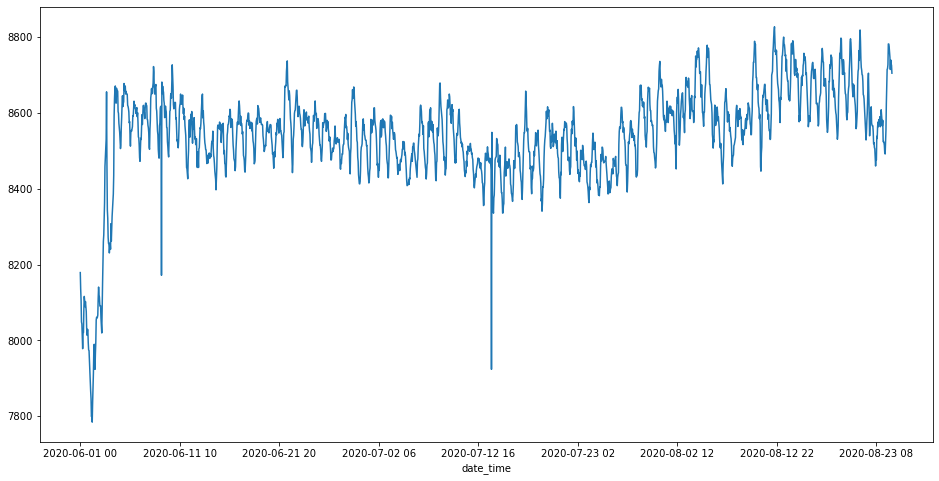

In [38]:
plt.figure(figsize=(16,8))
ele.plot()

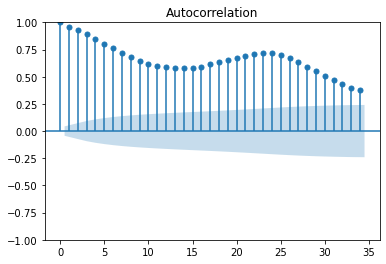

In [42]:
plot_acf(ele)
plt.show()

<AxesSubplot:xlabel='date_time'>

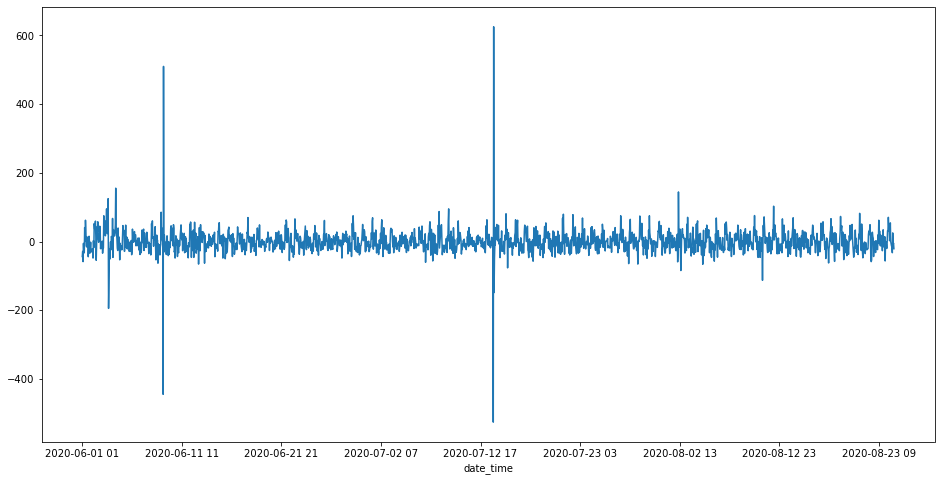

In [43]:
plt.figure(figsize=(16,8))
ele_diff = ele.diff(1)[1:]
ele_diff.plot()

중간중간 튀는 모습

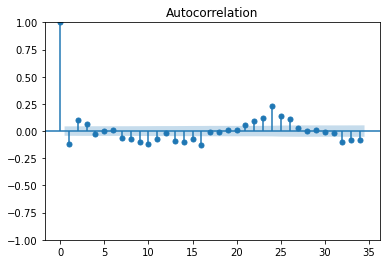

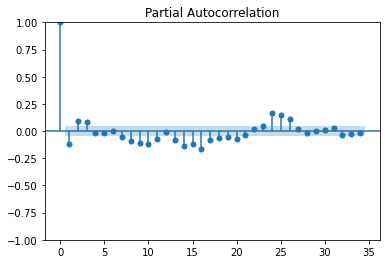

In [44]:
plot_acf(ele_diff)
plot_pacf(ele_diff, method='ywm')
plt.show()

차분은 1 

In [46]:
warnings.filterwarnings('ignore')
model = ARIMA(endog=ele, order=(0,1,0))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  전력사용량   No. Observations:                 2040
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -10164.931
Date:                Fri, 27 Jan 2023   AIC                          20331.863
Time:                        18:22:09   BIC                          20337.483
Sample:                    06-01-2020   HQIC                         20333.925
                         - 08-24-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1252.1659      5.385    232.527      0.000    1241.611    1262.720
===================================================================================
Ljung-Box (L1) (Q):                  26.80   Jarque-Bera (JB):            920427.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             1.69
Prob(H) (two-sided):                  0.00   Kurtosis:                       107.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

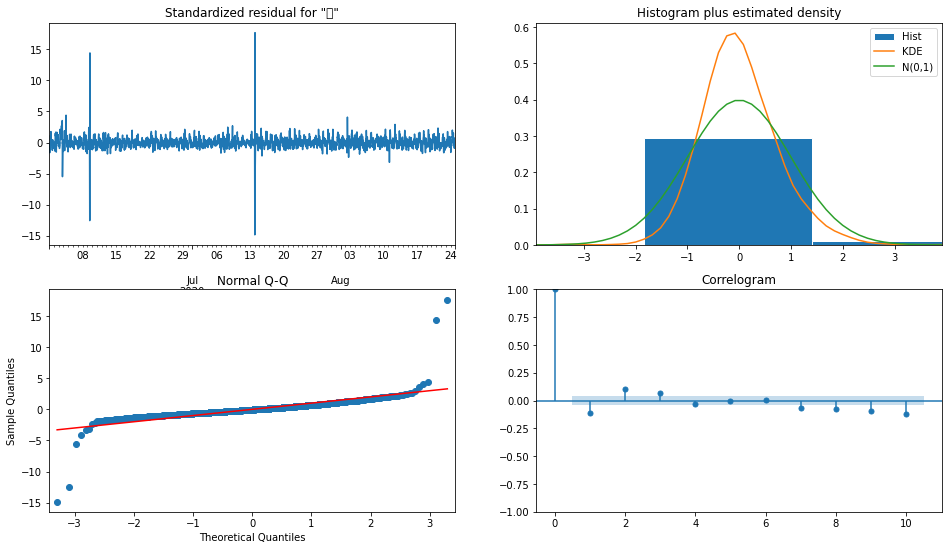

In [47]:
model.fit().plot_diagnostics(figsize=(16,9))
plt.show()

ARIMA(1,1,1)모형 적합

In [48]:
warnings.filterwarnings('ignore')
model2 = ARIMA(endog=ele, order=(1,1,1))
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  전력사용량   No. Observations:                 2040
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10148.344
Date:                Fri, 27 Jan 2023   AIC                          20302.687
Time:                        18:25:48   BIC                          20319.548
Sample:                    06-01-2020   HQIC                         20308.872
                         - 08-24-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3914      0.106     -3.692      0.000      -0.599      -0.184
ma.L1          0.2735      0.107      2.566      0.010       0.065       0.482
sigma2      1234.2579      8.389    147.129      0.000    1217.816    1250.700
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):            593200.97
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        86.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

내일 전처리 + 해석하는법 + 시각화 복습 더 많이 해야겠음.. 개어렵네